Loading the dataset from Kaggle to Google Colab

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dopemamba","key":"877fb5a9e364826742009eda82e9c0f3"}'}

In [2]:
!pip install -q kaggle


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess


Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 94% 403M/428M [00:00<00:00, 455MB/s]
100% 428M/428M [00:00<00:00, 499MB/s]


In [5]:
!unzip -q toronto-emotional-speech-set-tess.zip

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


In [31]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())
print('Dataset is loaded')


Dataset is loaded


In [32]:
paths[:5]


['/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_lot_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_dog_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_mood_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_nice_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_home_ps.wav']

In [33]:
labels[:5]


['ps', 'ps', 'ps', 'ps', 'ps']

In [20]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


,speech,label
0,/content/TESS Toronto emotional speech set dat...,ps
1,/content/TESS Toronto emotional speech set dat...,ps
2,/content/TESS Toronto emotional speech set dat...,ps
3,/content/TESS Toronto emotional speech set dat...,ps
4,/content/TESS Toronto emotional speech set dat...,ps


In [21]:
df['label'].value_counts()


,count
label,
ps,400
fear,400
happy,400
angry,400
disgust,400
sad,400
neutral,400


<Axes: xlabel='count', ylabel='label'>

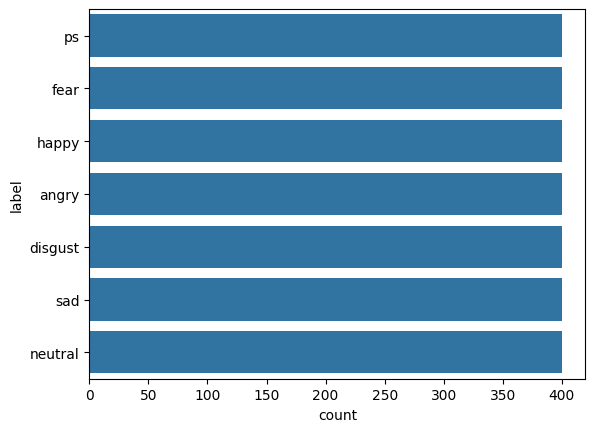

In [22]:
sns.countplot(df['label'])


In [34]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10, 4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11, 4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

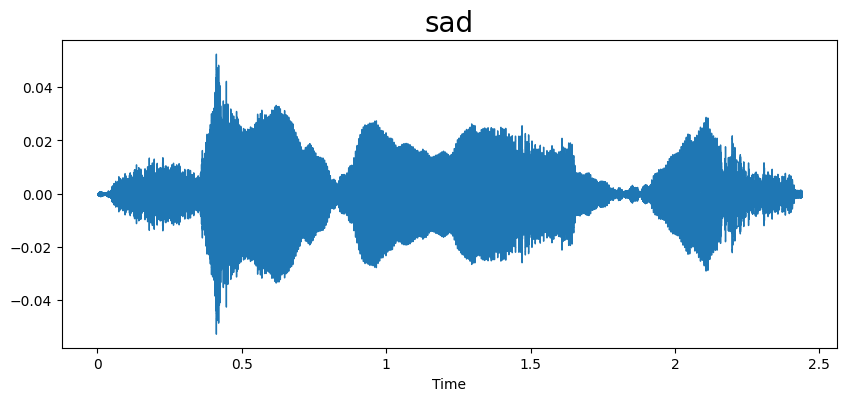

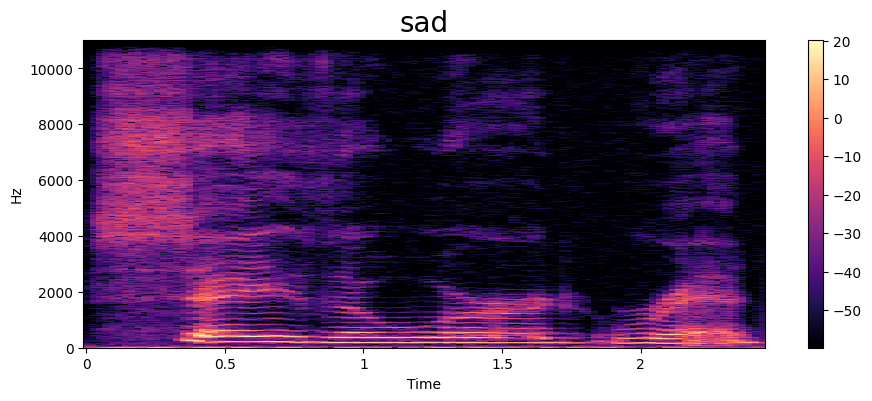

In [36]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


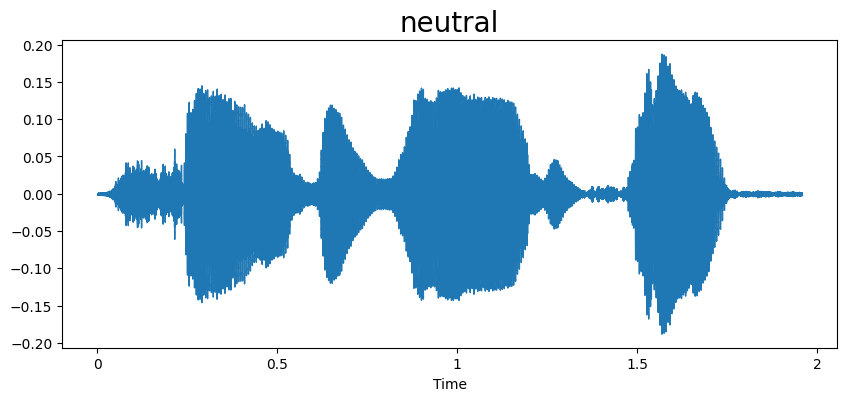

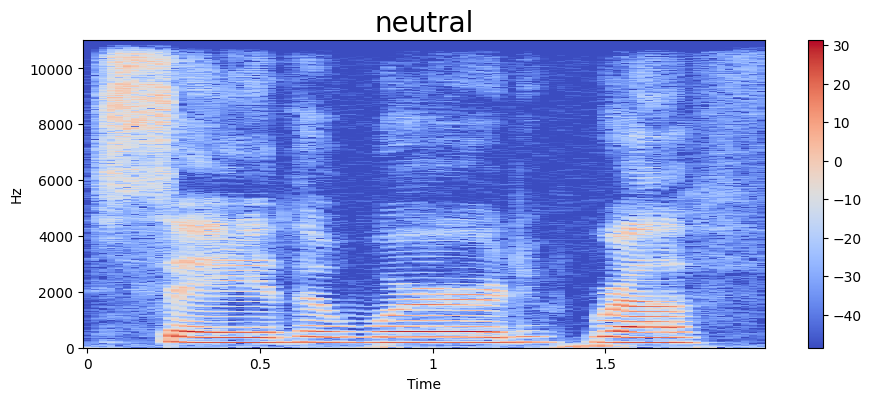

In [37]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


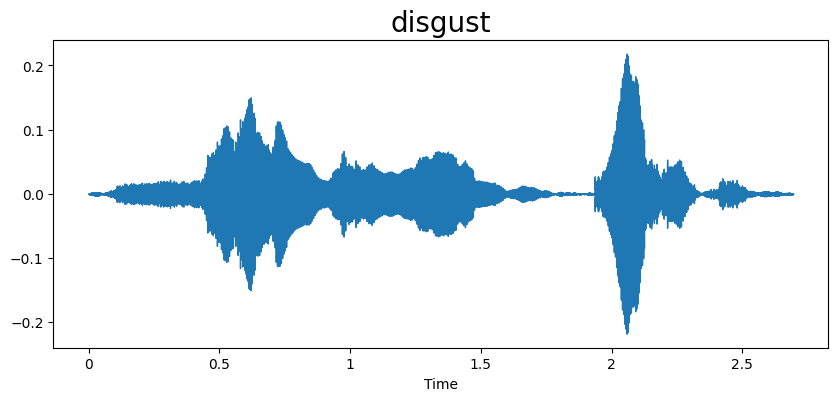

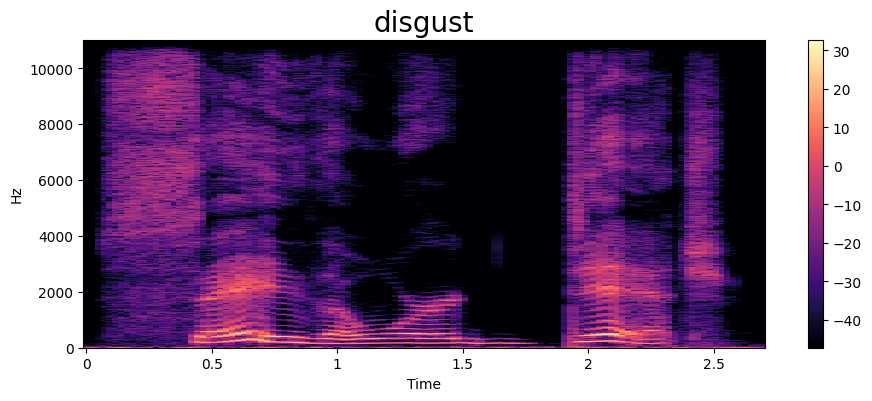

In [38]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


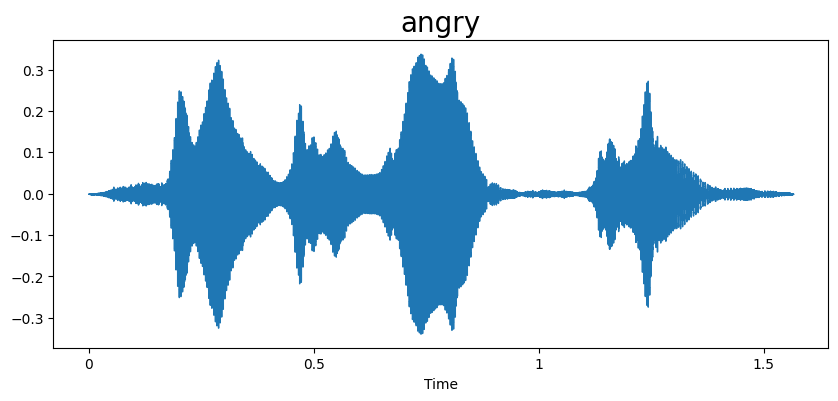

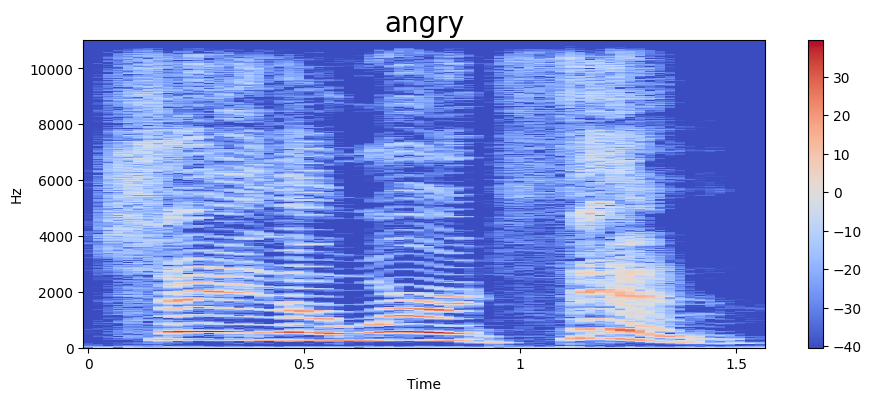

In [39]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


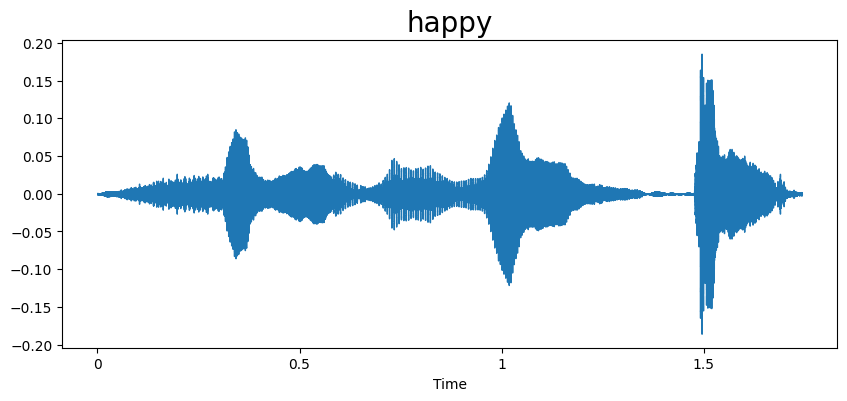

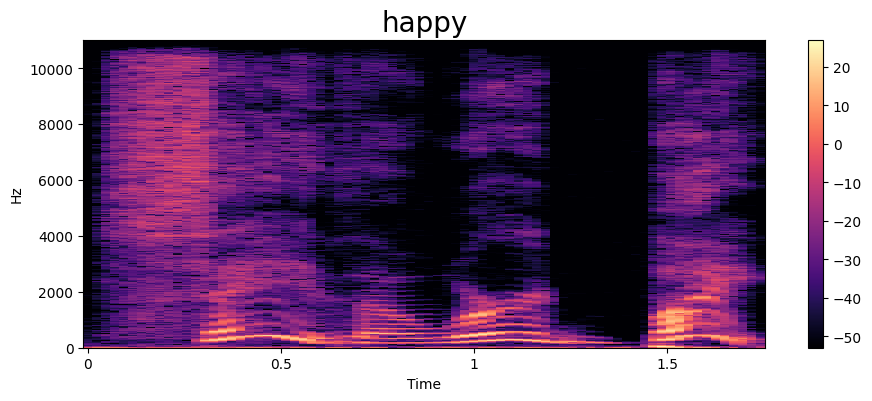

In [40]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


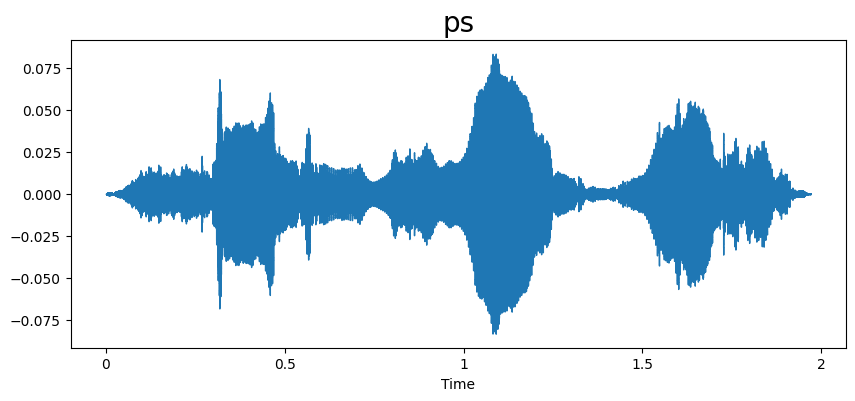

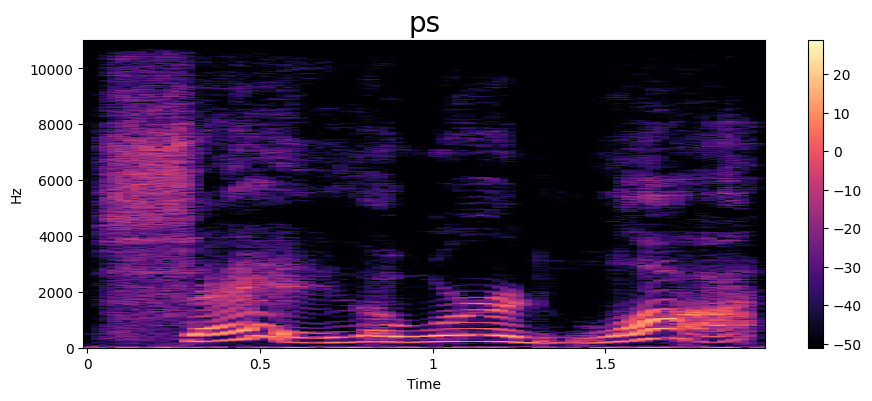

In [41]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


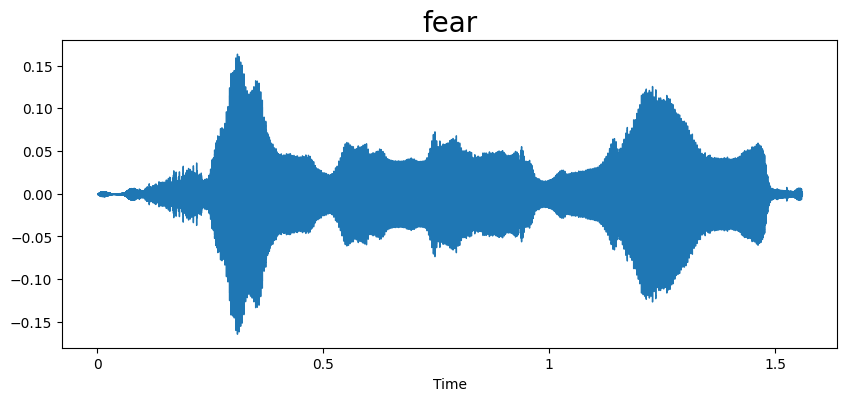

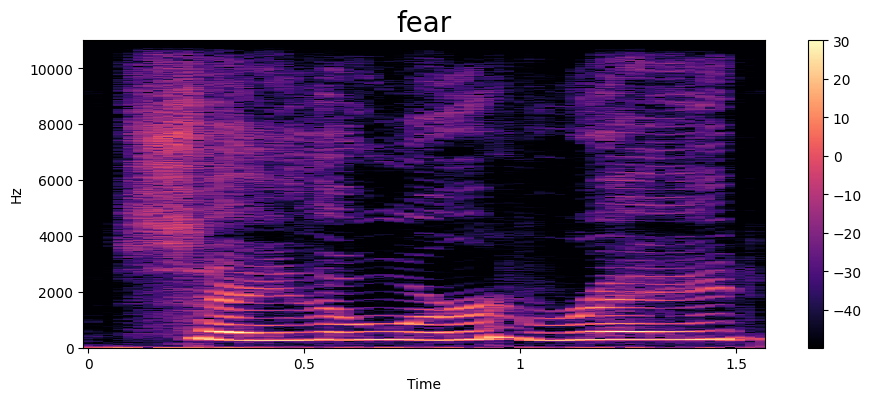

In [42]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


Feature Extraction


In [43]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc


In [44]:
extract_mfcc(df['speech'][0])


array([-499.28534  ,  131.38051  ,   14.61484  ,   -8.505296 ,
         -3.913761 ,    7.2382936,  -20.690502 ,   -0.5265068,
        -22.795649 ,   -8.097553 ,   -6.1475153,   -8.874653 ,
         -3.957349 ,   -3.3302894,   -2.387137 ,    2.6262727,
          1.031096 ,    6.3330736,    4.1090775,   -4.995784 ,
          2.07171  ,   -5.687704 ,    1.0357451,    4.888444 ,
         -5.0227365,    3.3294353,   -2.7093487,    3.9496117,
          5.2249904,    5.9597454,    8.950111 ,   12.906098 ,
         13.478798 ,    8.936478 ,   11.260578 ,   11.206078 ,
         10.414725 ,   10.877378 ,    7.2220974,    4.743988 ],
      dtype=float32)

In [45]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [46]:
x_mfcc


,speech
0,"[-499.28534, 131.38051, 14.61484, -8.505296, -..."
1,"[-441.33182, 113.11722, 17.325127, -13.18025, ..."
2,"[-434.06976, 111.498955, 41.991444, -5.9684324..."
3,"[-414.95715, 92.14921, 20.402058, -1.9017227, ..."
4,"[-489.7352, 123.720634, 22.084352, 8.003033, -..."
...,...
2795,"[-455.739, 106.42544, 7.565088, 14.144337, -29..."
2796,"[-424.51425, 95.32485, -1.6507325, 37.644062, ..."
2797,"[-409.6209, 105.88283, -21.932735, 8.138542, -..."
2798,"[-453.90457, 103.89699, -0.025447933, 15.61161..."


In [47]:
x = [x for x in x_mfcc]
x = np.array(x)
x.shape


(2800, 40)

In [48]:
x = np.expand_dims(x, -1)
x.shape


(2800, 40, 1)

In [49]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])



In [50]:
y = y.toarray()


In [51]:
y.shape


(2800, 7)

In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 123)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,891 (273.01 KB)

 Trainable params: 69,891 (273.01 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = model.fit(x,y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.2152 - loss: 1.9583 - val_accuracy: 0.0054 - val_loss: 1.9409
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4208 - loss: 1.7416 - val_accuracy: 0.1839 - val_loss: 1.9436
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4834 - loss: 1.5652 - val_accuracy: 0.2643 - val_loss: 1.8513
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5513 - loss: 1.3325 - val_accuracy: 0.2857 - val_loss: 1.6986
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5877 - loss: 1.1013 - val_accuracy: 0.3018 - val_loss: 1.4909
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6197 - loss: 0.9380 - val_accuracy: 0.3339 - val_loss: 1.3745
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6447 - loss: 0.8317 - val_accuracy: 0.4339 - val_loss: 1.3309
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7053 - loss: 0.7211 - val_accuracy: 0.5714 - val_loss

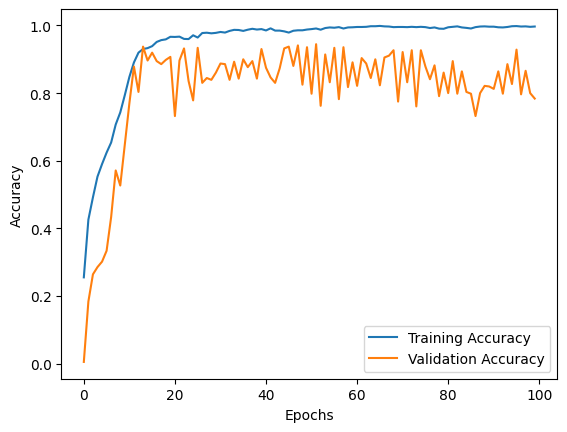

In [54]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




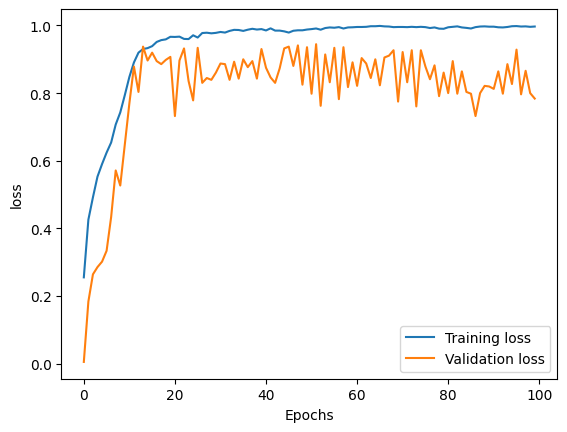

In [55]:
epochs = list(range(100))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, acc, label='Training loss')
plt.plot(epochs, val_acc, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



Model and encoder saved as:
- emotion_detection_model.h5 (HDF5 format)
- emotion_detection_model.keras (Native Keras format)
- label_encoder.pkl (OneHotEncoder for predictions)
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Class Labels: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'ps' 'sad']

CLASSIFICATION REPORT
              precision    recall  f1-score   support

       angry       0.95      1.00      0.98        80
     disgust       0.89      0.90      0.89        80
        fear       1.00      1.00      1.00        80
       happy       0.96      1.00      0.98        80
     neutral       1.00      1.00      1.00        80
          ps       0.91      1.00      0.95        80
         sad       1.00      0.80      0.89        80

    accuracy                           0.96       560
   macro avg       0.96      0.96      0.96       560
weighted avg       0.96      0.96      0.96       560


CONFUSION MATRIX
[[80  0  0  0  0  0  0]
 [ 0 72  0  0  0  8  0]
 [ 0  0 80  0  0  0  0]
 [ 

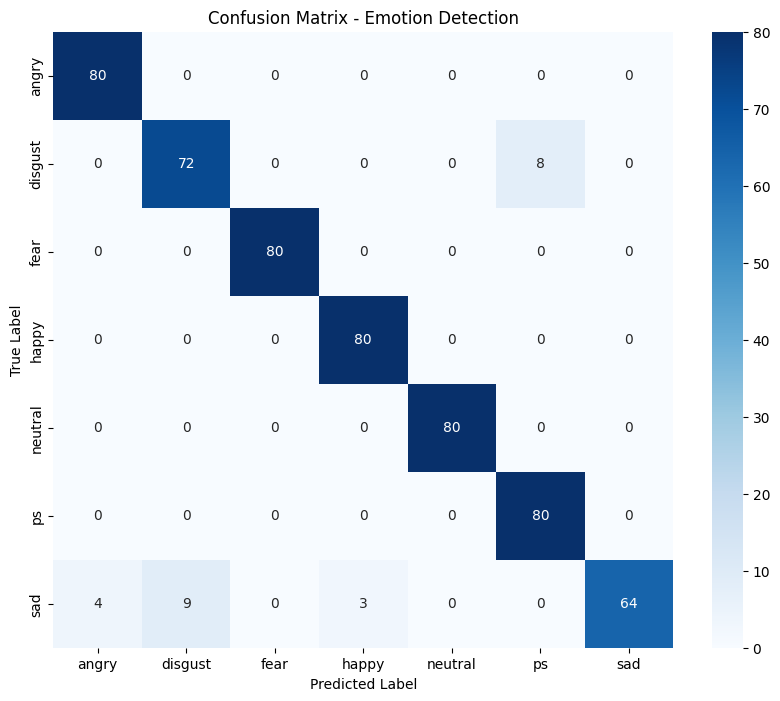


DETAILED METRICS BY CLASS
   Emotion  Precision  Recall  F1-Score  Support
0    angry     0.9524     1.0    0.9756       80
1  disgust     0.8889     0.9    0.8944       80
2     fear     1.0000     1.0    1.0000       80
3    happy     0.9639     1.0    0.9816       80
4  neutral     1.0000     1.0    1.0000       80
5       ps     0.9091     1.0    0.9524       80
6      sad     1.0000     0.8    0.8889       80

OVERALL METRICS
Test Accuracy: 0.9571
Macro Avg Precision: 0.9592
Macro Avg Recall: 0.9571
Macro Avg F1-Score: 0.9561

PER-CLASS ACCURACY
angry: 1.0000
disgust: 0.9000
fear: 1.0000
happy: 1.0000
neutral: 1.0000
ps: 1.0000
sad: 0.8000

MODEL EVALUATION COMPLETE


In [56]:
# Save the trained model in both formats
model.save('emotion_detection_model.h5')  # HDF5 format
model.save('emotion_detection_model.keras')  # Native Keras format

# Save the label encoder for future predictions
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(enc, f)

print("Model and encoder saved as:")
print("- emotion_detection_model.h5 (HDF5 format)")
print("- emotion_detection_model.keras (Native Keras format)")
print("- label_encoder.pkl (OneHotEncoder for predictions)")

# Split data for evaluation (same split as used in training)
from sklearn.model_selection import train_test_split

# Split the data with same random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=df['label'])

# Make predictions on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Get class labels for better readability
class_labels = enc.categories_[0]  # Get original label names
print("Class Labels:", class_labels)

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test_classes, y_pred_classes, target_names=class_labels))

# Confusion Matrix
print("\n" + "="*50)
print("CONFUSION MATRIX")
print("="*50)
cm = confusion_matrix(y_test_classes, y_pred_classes)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Emotion Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Additional Metrics
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, support = precision_recall_fscore_support(y_test_classes, y_pred_classes, average=None)

print("\n" + "="*50)
print("DETAILED METRICS BY CLASS")
print("="*50)
metrics_df = pd.DataFrame({
    'Emotion': class_labels,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})
print(metrics_df.round(4))

# Overall Metrics
print("\n" + "="*50)
print("OVERALL METRICS")
print("="*50)
print(f"Test Accuracy: {accuracy_score(y_test_classes, y_pred_classes):.4f}")
print(f"Macro Avg Precision: {precision.mean():.4f}")
print(f"Macro Avg Recall: {recall.mean():.4f}")
print(f"Macro Avg F1-Score: {f1.mean():.4f}")

# Per-class accuracy
print("\n" + "="*50)
print("PER-CLASS ACCURACY")
print("="*50)
for i, emotion in enumerate(class_labels):
    class_mask = y_test_classes == i
    if class_mask.sum() > 0:  # Check if class exists in test set
        class_acc = (y_pred_classes[class_mask] == i).mean()
        print(f"{emotion}: {class_acc:.4f}")

print("\n" + "="*50)
print("MODEL EVALUATION COMPLETE")
print("="*50)